<a href="https://colab.research.google.com/github/psylockeh/calculadora-imc/blob/main/projeto_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# importando as bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importando a biblioteca para carregar arquivos do drive
from google.colab import drive

# Importando bibliotecas referentes às redes neurais
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


# Importando outras bibliotecas uteis
from sklearn.model_selection import train_test_split
import os
import random

#importando bibliotecas de métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import random # Importing the random module within the cell

from tensorflow.keras.utils import load_img # Import the load_img function
import random
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential # Make sure to import Sequential

In [9]:
from google.colab import drive
drive.mount('/content/drive')


# Caminhos das pastas
caminho_cat = '/content/drive/MyDrive/datasets/test/Cat'
caminho_dog = '/content/drive/MyDrive/datasets/test/Dog'


Mounted at /content/drive


In [68]:
# Listar as imagens de cada pasta
imagens_cat = os.listdir(caminho_cat)
imagens_dog = os.listdir(caminho_dog)

# Criar listas com os caminhos completos e os rótulos
nome_arquivo = []
tipos = []

# Adicionando as imagens de gatos
for img in imagens_cat:
    nome_arquivo.append(os.path.join('Cat', img))
    tipos.append(0)  # 0 para gato

# Adicionando as imagens de cachorros
for img in imagens_dog:
    nome_arquivo.append(os.path.join('Dog', img))
    tipos.append(1)  # 1 para cachorro

# Criar o DataFrame
df = pd.DataFrame({
    'nome_arquivo': nome_arquivo,
    'tipo': tipos
})


In [11]:
# Conferindo a tabela
print (df.head())

  nome_arquivo  tipo
0  Cat/107.jpg     0
1  Cat/105.jpg     0
2   Cat/11.jpg     0
3  Cat/114.jpg     0
4  Cat/119.jpg     0


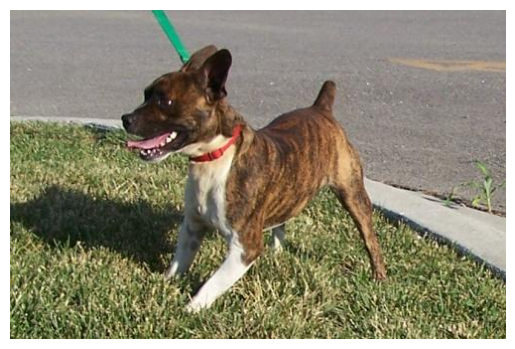

In [12]:
import random
# Selecionar uma imagem aleatória do DataFrame
exemplo = random.choice(df['nome_arquivo'])  # Escolhe aleatoriamente um arquivo do DataFrame

# Separate the folder (cat or dog) and file name
folder, file_name = os.path.split(exemplo)

# Construct the complete image path using the original folder paths
caminho_imagem = os.path.join('/content/drive/MyDrive/datasets/test/', folder, file_name)

# Carregar e exibir a imagem
image = load_img(caminho_imagem)
plt.imshow(image)
plt.axis('off')  # Remove os eixos para melhorar a visualização
plt.show()

In [13]:
# O modelo pode não entender muito bem caso o tamanho das imagens seja diferente, então vamos deixar iguais
FAST_RUN = False
IMAGE_WIDTH=256
IMAGE_HEIGHT=256
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [14]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax')) # 2 pois temos dois tipos: cão e gato

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      58,982,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,080,130 (225.37 MB)

 Trainable params: 59,078,658 (225.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)

In [16]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [17]:
callbacks = [earlystop, learning_rate_reduction]

In [18]:
df["tipo"] = df["tipo"].replace({0: 'cat', 1: 'dog'})

In [19]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=0)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [20]:
train_df['tipo'].value_counts()

,count
tipo,
dog,805
cat,796


In [21]:
validate_df['tipo'].value_counts()

,count
tipo,
cat,205
dog,196


In [22]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=16

In [27]:
# Define the base directory where the images are located
caminho = '/content/drive/MyDrive/datasets/test/' # Assuming that your test dataset is in that folder

# Creating the training data generator
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2
)

# Creating the training generator using flow_from_dataframe
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    caminho, # Using the newly defined 'caminho' variable
    x_col='nome_arquivo',
    y_col='tipo',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 1600 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="nome_arquivo". These filename(s) will be ignored.
  warnings.warn(


In [28]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    caminho,
    x_col='nome_arquivo',
    y_col='tipo',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 400 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="nome_arquivo". These filename(s) will be ignored.
  warnings.warn(


In [29]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    caminho,
    x_col='nome_arquivo',
    y_col='tipo',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


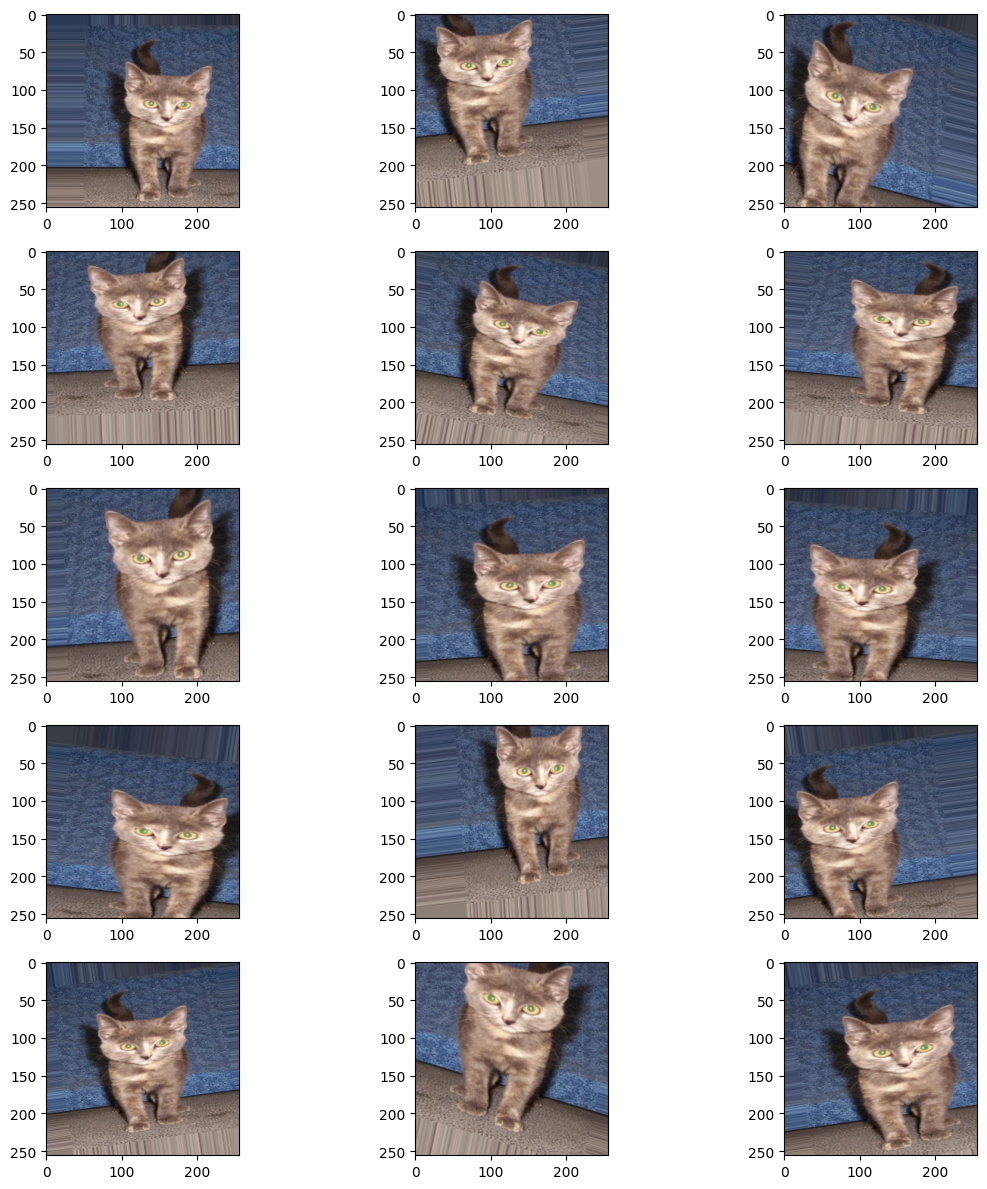

In [30]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [34]:
import os

# Assuming 'caminho' is the base directory where 'Cat' and 'Dog' folders are located
caminho = '/content/drive/MyDrive/datasets/test/'

# Update the 'nome_arquivo' column in train_df and validate_df with full paths
train_df['nome_arquivo'] = train_df['nome_arquivo'].apply(lambda x: os.path.join(caminho, x))
validate_df['nome_arquivo'] = validate_df['nome_arquivo'].apply(lambda x: os.path.join(caminho, x))

# Now, when you create the generators, you can directly use the 'nome_arquivo' column:
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='nome_arquivo',
    y_col='tipo',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size,
    # Remove the 'directory' argument, as it's now included in 'nome_arquivo'
    # directory=caminho
)

# Similarly, update the validation_generator:
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    x_col='nome_arquivo',
    y_col='tipo',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size,
    # Remove the 'directory' argument here as well
    # directory=caminho
)

Found 1600 validated image filenames belonging to 2 classes.
Found 400 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="nome_arquivo". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="nome_arquivo". These filename(s) will be ignored.
  warnings.warn(


In [39]:
epochs=3 if FAST_RUN else 50
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 554s 6s/step - accuracy: 0.6257 - loss: 0.6490 - val_accuracy: 0.7025 - val_loss: 0.6046 - learning_rate: 0.0010
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 562s 6s/step - accuracy: 0.6866 - loss: 0.5871 - val_accuracy: 0.6825 - val_loss: 0.6225 - learning_rate: 0.0010
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 173ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6570 - loss: 0.6076
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
100/100 ━━━━━━━━━━━━━━━━━━━━ 600s 5s/step - accuracy: 0.6571 - loss: 0.6076 - val_accuracy: 0.7000 - val_loss: 0.6197 - learning_rate: 0.0010
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 7/50
100/100 ━━━━━━━━━━━

In [37]:
import os
import PIL

caminho = '/content/drive/MyDrive/datasets/test/'

def check_and_fix_image(image_path):
    try:

        img = PIL.Image.open(image_path)
        # If successful, verify the image format
        if img.format not in ['JPEG', 'PNG', 'GIF', 'BMP']:
            print(f"Warning: Image '{image_path}' has an unusual format: {img.format}. It might cause issues.")
        # No errors, the image is likely fine
        return True
    except PIL.UnidentifiedImageError:
        # Image is corrupted or has an unsupported format
        print(f"Error: Image '{image_path}' is corrupted or has an unsupported format.")
        # You could optionally remove or try to repair the image here
        return False
    except FileNotFoundError:
        print(f"Error: Image file '{image_path}' not found.")
        return False

# Iterate through all image files in the train and validate DataFrames
for index, row in train_df.iterrows():
    image_path = row['nome_arquivo']
    if not check_and_fix_image(image_path):
        # If the image is corrupted, consider removing it from the DataFrame
        train_df.drop(index, inplace=True)

for index, row in validate_df.iterrows():
    image_path = row['nome_arquivo']
    if not check_and_fix_image(image_path):
        validate_df.drop(index, inplace=True)

# Recreate the generators after potentially removing corrupted images
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='nome_arquivo',
    y_col='tipo',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    x_col='nome_arquivo',
    y_col='tipo',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Error: Image '/content/drive/MyDrive/datasets/test/Dog/Thumbs.db' is corrupted or has an unsupported format.
Error: Image '/content/drive/MyDrive/datasets/test/Cat/666.jpg' is corrupted or has an unsupported format.
Error: Image '/content/drive/MyDrive/datasets/test/Cat/Thumbs.db' is corrupted or has an unsupported format.
Found 1599 validated image filenames belonging to 2 classes.
Found 400 validated image filenames belonging to 2 classes.


In [41]:
model.save_weights("model.weights.h5")

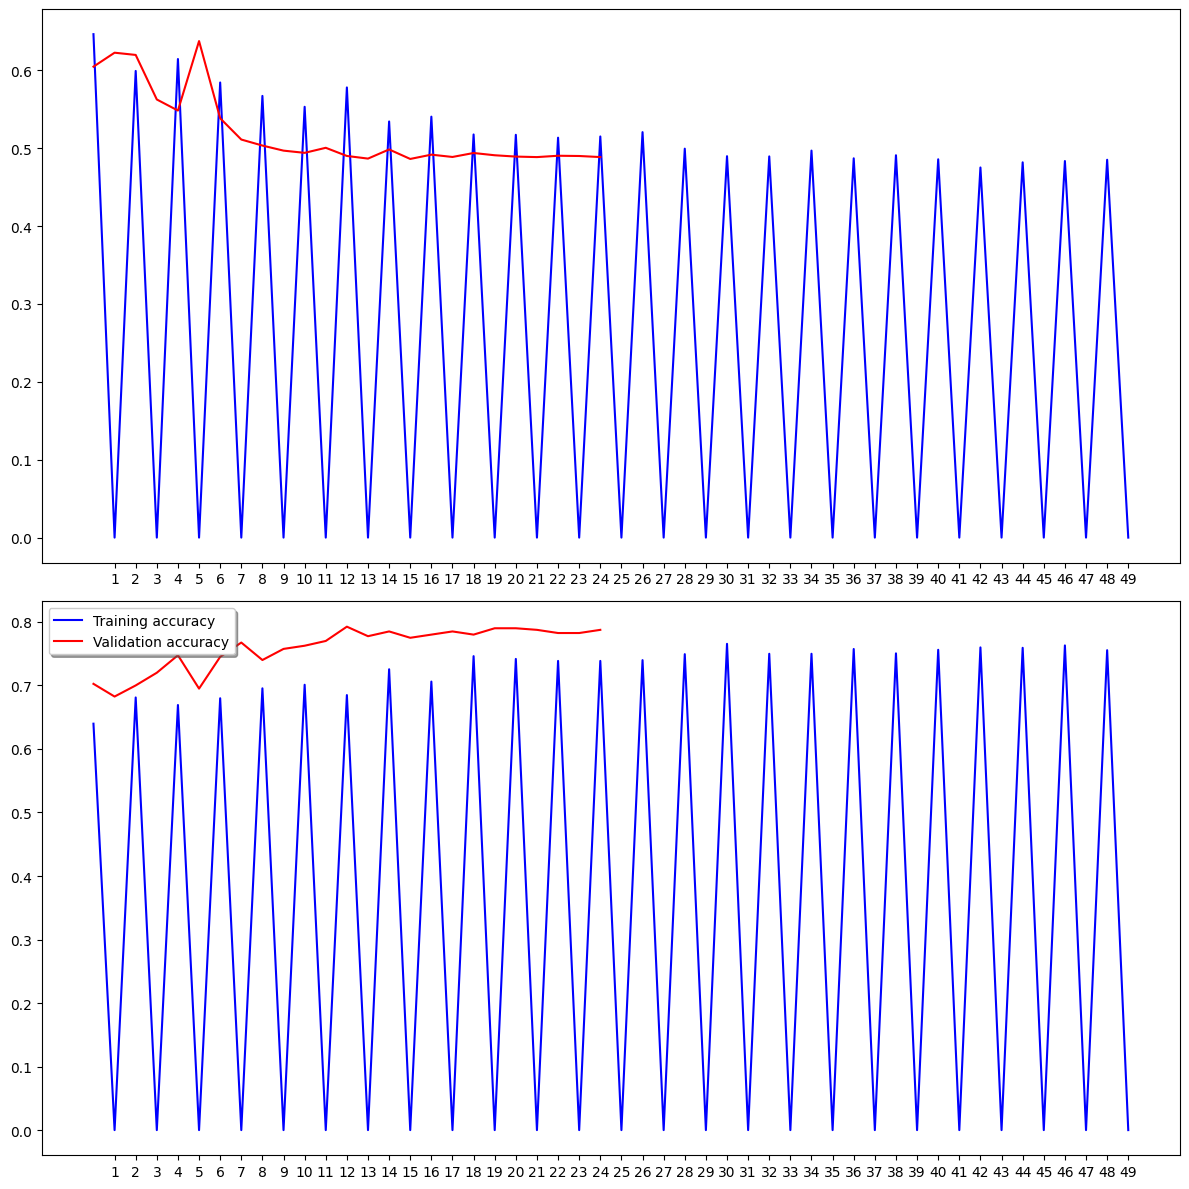

In [42]:
# Avaliando o modelo por meio de gráficos
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [45]:
loss, accuracy = model.evaluate(validation_generator, steps=total_validate//batch_size)  # Remove workers argument
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8018 - loss: 0.4604
Test: accuracy = 0.787500  ;  loss = 0.488547 


In [48]:
# Get the model's predictions on the validation data
y_pred = model.predict(validation_generator)

# Now you can use y_pred to find the predicted labels
validate_df['y_pred'] = np.argmax(y_pred, axis = -1)

# Rest of the code remains the same
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
validate_df['y_pred'] = validate_df['y_pred'].replace(label_map)

25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 973ms/step


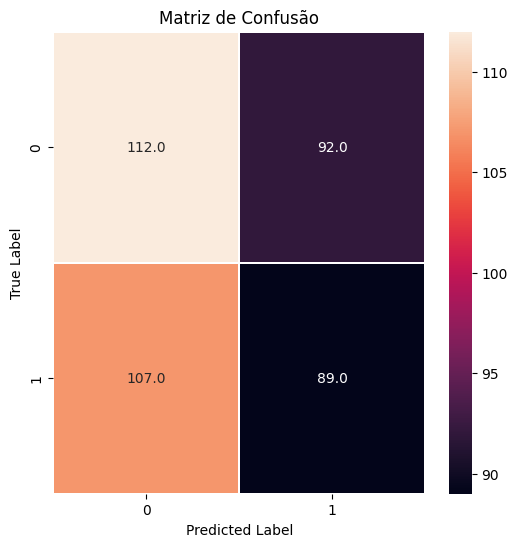

In [49]:
# Utilizando a matriz de confusão
confusion_mtx = confusion_matrix(validate_df["tipo"], validate_df['y_pred'])
# plotando a matriz
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matriz de Confusão")
plt.show()

In [50]:
# Mostrando o classification report
report = classification_report(validate_df["tipo"], validate_df['y_pred'], target_names=['0','1'])

print(report)

              precision    recall  f1-score   support

           0       0.51      0.55      0.53       204
           1       0.49      0.45      0.47       196

    accuracy                           0.50       400
   macro avg       0.50      0.50      0.50       400
weighted avg       0.50      0.50      0.50       400



In [86]:


# Define o caminho base para o dataset
test_data_dir = '/content/drive/MyDrive/datasets/train'

# Criar listas para armazenar os caminhos completos e as classes (rótulos)
filepaths = []
labels = []

# Iterar pelas subpastas (cat e dog)
for folder in ['Cat', 'Dog']:
    folder_path = os.path.join(test_data_dir, folder)
    filenames = os.listdir(folder_path)

    for filename in filenames:
        # Adicionar o caminho completo do arquivo
        filepaths.append(os.path.join(folder, filename))
        # Adicionar o rótulo (0 para cat, 1 para dog)
        labels.append(0 if folder == 'Cat' else 1)

# Criar o DataFrame
test_df = pd.DataFrame({
    'nome_arquivo': filepaths,  # Caminhos relativos
    'label': labels  # Rótulos
})

# Exibir as primeiras linhas do DataFrame para conferência
print(test_df.head())

# Número total de amostras
nb_samples = test_df.shape[0]
print(f"Total de amostras: {nb_samples}")


  nome_arquivo  label
0  Cat/112.jpg      0
1   Cat/10.jpg      0
2   Cat/11.jpg      0
3  Cat/114.jpg      0
4  Cat/117.jpg      0
Total de amostras: 2008


In [93]:
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    test_data_dir,
    x_col='nome_arquivo',
    y_col='label',
    target_size=(256, 256),  # Substitua pelo tamanho correto usado no treinamento
    class_mode='binary',
    batch_size=batch_size,
    shuffle=False
)


Found 2006 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2 invalid image filename(s) in x_col="nome_arquivo". These filename(s) will be ignored.
  warnings.warn(


In [71]:
print(test_df.columns)


Index(['nome_arquivo'], dtype='object')


In [72]:
print(test_df.head())


Empty DataFrame
Columns: [nome_arquivo]
Index: []


In [89]:
test_df = pd.DataFrame({
    'nome_arquivo': filepaths,  # Caminhos relativos
    'label': labels  # Rótulos
})

# Convert the 'label' column to strings
test_df['label'] = test_df['label'].astype(str)


In [87]:
print(test_df['label'].value_counts())


label
0    1007
1    1001
Name: count, dtype: int64


In [97]:
# Before calling model.predict, print the shape of the first batch:
for batch_x, batch_y in test_generator:
    print("Shape of batch_x:", batch_x.shape)
    break

Shape of batch_x: (16, 256, 256, 3)


In [98]:
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    test_data_dir,
    x_col='nome_arquivo',
    y_col='label',
    target_size=(256, 256),
    class_mode='categorical',  # Changed to 'categorical'
    batch_size=batch_size,
    shuffle=False
)

Found 2006 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2 invalid image filename(s) in x_col="nome_arquivo". These filename(s) will be ignored.
  warnings.warn(


In [100]:
# Get predictions using the model
predict = model.predict(test_generator)

# Add predictions to the DataFrame
test_df['tipo'] = np.argmax(predict, axis=-1)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 33/126 ━━━━━━━━━━━━━━━━━━━━ 1:30 978ms/step

UnknownError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7e6dc6f8a7f0>
Traceback (most recent call last):

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/script_ops.py", line 270, in __call__
    ret = func(*args)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py", line 265, in _get_iterator
    for i, batch in enumerate(gen_fn()):

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py", line 258, in generator_fn
    yield self.py_dataset[i]

  File "/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py", line 68, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py", line 313, in _get_batches_of_transformed_samples
    img = image_utils.load_img(

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py", line 236, in load_img
    img = pil_image.open(io.BytesIO(f.read()))

  File "/usr/local/lib/python3.10/dist-packages/PIL/Image.py", line 3532, in open
    raise UnidentifiedImageError(msg)

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7e6dc6f8a7f0>


	 [[{{node PyFunc}}]] [Op:IteratorGetNext] name: 

In [ ]:
test_df['tipo'] = test_df['tipo'].replace({ 'dog': 1, 'cat': 0 })

In [2]:
sample_test = test_df.head(9)
sample_test.head()
plt.figure(figsize=(9, 11))
for index, row in sample_test.iterrows():
    filename = row['nome_arquivo']
    category = row['tipo']
    img = load_img("/content/drive/MyDrive/datasets/test"+filename, target_size=IMAGE_SIZE)
    plt.subplot(3, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' , fontsize = 15)
plt.tight_layout()
plt.show()

NameError: name 'test_df' is not defined